In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [11]:
cd ..

C:\Users\Fatma\Desktop\Projets\optibrain_


In [12]:
from optibrain.base.base import SurrogateModeling

C:\Users\Fatma\Desktop\Projets\optibrain_\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
path = "C:/Users/Fatma/Downloads/WireModelData/DB_wiremodel24.pickle"

In [14]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
path = "C:/Users/Fatma/Downloads/WireModelData/DB_wiremodel24.pickle"
with open(path, "rb") as f:
    x = pickle.load(f)
X = pd.DataFrame(x['INPUT']['data'])
X.columns = ['tension', 'amplitude', 'deplacement_serrage',
             'deplacement_poids_propre', 'span_length', 'denivele']
y = x['OUTPUT']['data']
# print(len(y))
# print(len(y[0]))
# exit()
outputs = pd.DataFrame(y)
outputs.columns = ["min", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "max"]
list_target = ['min', '40%', '10%', '90%']
list_features = ['tension', 'amplitude', "deplacement_poids_propre"]
y_selected = outputs[list_target]
X = X[list_features]
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y_selected), test_size=.2)

C:\Users\Fatma\AppData\Local\Temp\ipykernel_14816\2857219823.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  x = pickle.load(f)


In [15]:
from optibrain import SurrogateModeling

In [16]:
srgm = SurrogateModeling(['catboost','xgboost','lgbm'], 'regression')

#### Get the best model from the estimator list

In [17]:
srgm.get_best_model(X_train, y_train)

C:\Users\Fatma\Desktop\Projets\optibrain_\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [18]:
srgm.get_estimators_performances

catboost    0.888390
lgbm        0.853206
xgboost     0.262181
dtype: float64

In [19]:
srgm.model

MultiOutputRegressor(estimator=<flaml.automl.model.CatBoostEstimator object at 0x00000213131AE9C0>)

In [22]:
y_pred = srgm.model.predict(X_test)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_predictions_regression(y_true, y_pred):
    """
    Affiche les résultats des prédictions pour la régression.

    :param y_true: Valeurs réelles
    :param y_pred: Valeurs prédites
    """
    if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
        y_true = y_true.values
    if isinstance(y_pred, pd.DataFrame) or isinstance(y_pred, pd.Series):
        y_pred = y_pred.values

  
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title("Régression : valeurs réelles vs. prédites")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


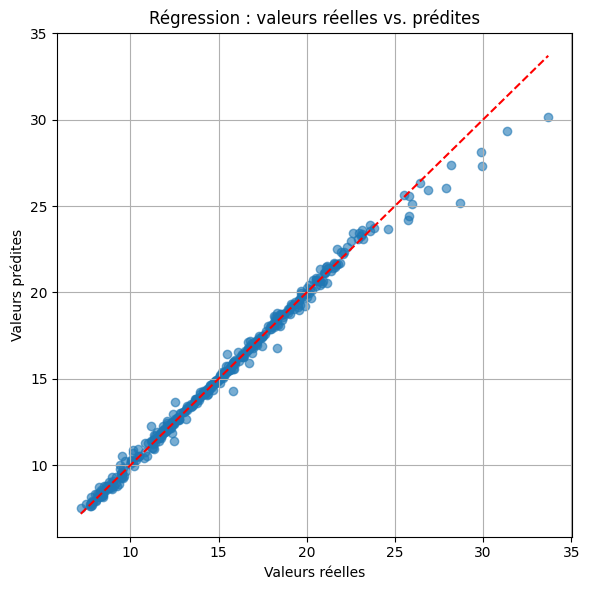

In [23]:
plot_predictions_regression(y_test, y_pred)


### Save the trained selected model

In [24]:
srgm.save("./metamodel_test", "regression_catboost")

Data of the model are saved in ./metamodel_test\regression_catboost.h5.


### Add personnalized estimators

In [25]:
from optibrain.utils.kriging_model import KRGModel
from optibrain.utils.NN_model import FullNeuralNetwork

In [34]:
surrogate_model = SurrogateModeling(['catboost', 'KRG'], 'regression')

In [35]:
surrogate_model.get_best_model(X_train, y_train, learners={"KRG": KRGModel, "Neural":FullNeuralNetwork})

C:\Users\Fatma\Desktop\Projets\optibrain_\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 356
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec): 11.8370762
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 40
   
   Predicting ...
   Predicting - done. Time (sec):  0.0006213
   
   Prediction time/pt. (sec) :  0.0000155
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 356
   
   Predicting ...
   Predicting - done. Time (sec):  0.0049984
   
   Prediction time/pt. (sec) :  0.0000140
   
___________________________________________________________________________
   
                          

In [36]:
surrogate_model.model

MultiOutputRegressor(estimator=KRGModel(task=<flaml.automl.task.generic_task.GenericTask object at 0x0000021323F5E000>))

In [37]:
surrogate_model.get_estimators_performances

KRG         0.966848
catboost    0.883985
dtype: float64

In [38]:
y_pred = surrogate_model.model.predict(X_test)

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 110
   
   Predicting ...
   Predicting - done. Time (sec):  0.0089378
   
   Prediction time/pt. (sec) :  0.0000813
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 110
   
   Predicting ...
   Predicting - done. Time (sec):  0.0040472
   
   Prediction time/pt. (sec) :  0.0000368
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 110
   
   Predicting ...
   Predicting - done. Time (sec):  0.0061429
   
   Prediction time/pt. (sec) :  0.0000558
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 110
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


In [39]:
y_pred = pd.DataFrame(y_pred)

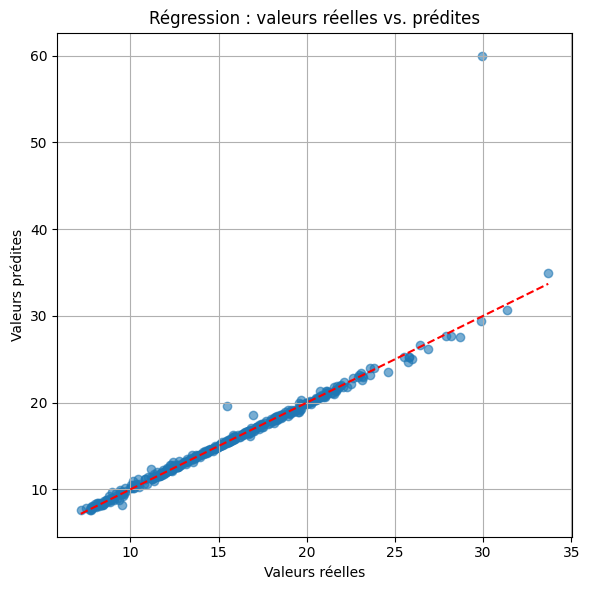

In [40]:
plot_predictions_regression(y_test, y_pred)

### Save the selected trained model

In [41]:
surrogate_model.save('./metamodel_test', 'regression_KRG')

Data of the model are saved in ./metamodel_test\regression_KRG.h5.
